# Online shoppers tabular experiment

Set up the training environment and the datamodule

In [1]:
import torch
from torch import nn
from torch.optim import Adam
from torch_uncertainty import TUTrainer
from torch_uncertainty.datamodules.classification import OnlineShoppersDataModule
from torch_uncertainty.models.mlp import mlp
from torch_uncertainty.routines import ClassificationRoutine

torch.manual_seed(42)
NUM_EPOCHS = 10
DEVICE = "cuda:0"
SAVE_IMG = False

trainer = TUTrainer(max_epochs=NUM_EPOCHS, devices=(int(DEVICE.split(":")[1]),))
dm = OnlineShoppersDataModule("data", batch_size=128, test_split=0.8)
dm.prepare_data()
dm.setup()
num_features = dm.dataset.num_features

/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Using downloaded and verified file: data/online_shoppers/online_shoppers_intention.csv.zip
Extracting data/online_shoppers/online_shoppers_intention.csv.zip to data/online_shoppers


Train the CE-based model

In [2]:
model = mlp(in_features=num_features, num_outputs=1, hidden_dims=[4 * num_features, 2 * num_features])
optim_recipe = Adam(model.parameters(), lr=0.001)
routine = ClassificationRoutine(model, num_classes=1, loss=nn.BCEWithLogitsLoss(), optim_recipe=optim_recipe)
trainer.fit(routine, dm)
trainer.test(routine, dm);

/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `FPR95` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


Using downloaded and verified file: data/online_shoppers/online_shoppers_intention.csv.zip
Extracting data/online_shoppers/online_shoppers_intention.csv.zip to data/online_shoppers


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name             | Type              | Params | Mode 
---------------------------------------------------------------
0 | model            | _MLP              | 9.6 K  | train
1 | loss             | BCEWithLogitsLoss | 0      | train
2 | format_batch_fn  | Identity          | 0      | train
3 | val_cls_metrics  | MetricCollection  | 0      | train
4 | test_cls_metrics | MetricCollection  | 0      | train
5 | test_id_entropy  | Entropy           | 0      | train
6 | mixup            | Identity          | 0      | train
---------------------------------------------------------------
9.6 K     Trainable params
0         Non-trainable params
9.6 K     Total params
0.039     Total estimated model params size (MB)
35        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.


/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.
/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 20/20 [00:00<00:00, 22.14it/s, v_num=156, train_loss=0.215, Acc%=88.70] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 20/20 [00:00<00:00, 21.82it/s, v_num=156, train_loss=0.215, Acc%=88.70]
Using downloaded and verified file: data/online_shoppers/online_shoppers_intention.csv.zip
Extracting data/online_shoppers/online_shoppers_intention.csv.zip to data/online_shoppers


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 78/78 [00:01<00:00, 74.56it/s]


┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Test metric  ┃      Classification       ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     AUPR     │          65.238%          │
│    AUROC     │          89.423%          │
│     Acc      │          88.657%          │
│    Brier     │          0.08287          │
│   Entropy    │          0.14915          │
│    FRP95     │          0.45574          │
│     NLL      │          0.02774          │
└──────────────┴───────────────────────────┘
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Test metric  ┃        Calibration        ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     ECE      │          0.01604          │
│     aECE     │          0.01626          │
└──────────────┴───────────────────────────┘
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Test metric  ┃ Selective Classification  ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    AUGRC     │          2.269%           │
│     AURC     │          2.982%           │
│  Cov@5Risk   │          77.810%          │
│  Risk@80Cov  │          5.385%           │
└──────────────┴───────────────────────────┘

Train the LS-based model

In [3]:
from torch_uncertainty.losses.classification import BCEWithLogitsLSLoss

ls_trainer = TUTrainer(max_epochs=NUM_EPOCHS, devices=(int(DEVICE.split(":")[1]),))
ls_model = mlp(in_features=num_features, num_outputs=1, hidden_dims=[4 * num_features, 2 * num_features])
optim_recipe = Adam(ls_model.parameters(), lr=0.001)
ls_routine = ClassificationRoutine(
    ls_model, num_classes=1, loss=BCEWithLogitsLSLoss(label_smoothing=0.6), optim_recipe=optim_recipe
)
ls_trainer.fit(ls_routine, dm)
ls_trainer.test(ls_routine, dm);

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Using downloaded and verified file: data/online_shoppers/online_shoppers_intention.csv.zip
Extracting data/online_shoppers/online_shoppers_intention.csv.zip to data/online_shoppers


/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `FPR95` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name             | Type                | Params | Mode 
-----------------------------------------------------------------
0 | model            | _MLP                | 9.6 K  | train
1 | loss             | BCEWithLogitsLSLoss | 0      | train
2 | format_batch_fn  | Identity            | 0      | train
3 | val_cls_metrics  | MetricCollection    | 0      | train
4 | test_cls_metrics | MetricCollection    | 0      | train
5 | test_id_entropy  | Entropy             | 0      | train
6 | mixup            | Identity            | 0      | train
-----------------------------------------------------------------
9.6 K     Trainable params
0         Non-trainable params

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.


/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.
/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 9: 100%|██████████| 20/20 [00:00<00:00, 22.45it/s, v_num=157, train_loss=0.624, Acc%=88.50] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 20/20 [00:00<00:00, 21.99it/s, v_num=157, train_loss=0.624, Acc%=88.50]
Using downloaded and verified file: data/online_shoppers/online_shoppers_intention.csv.zip
Extracting data/online_shoppers/online_shoppers_intention.csv.zip to data/online_shoppers


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/soumik/miniconda3/envs/tu/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 78/78 [00:01<00:00, 72.15it/s]


┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Test metric  ┃      Classification       ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     AUPR     │          65.782%          │
│    AUROC     │          89.722%          │
│     Acc      │          88.454%          │
│    Brier     │          0.13918          │
│   Entropy    │          0.35693          │
│    FRP95     │          0.42030          │
│     NLL      │          0.00878          │
└──────────────┴───────────────────────────┘
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Test metric  ┃        Calibration        ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     ECE      │          0.22661          │
│     aECE     │          0.22698          │
└──────────────┴───────────────────────────┘
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Test metric  ┃ Selective Classification  ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    AUGRC     │          2.247%           │
│     AURC     │          3.556%           │
│  Cov@5Risk   │          80.568%          │
│  Risk@80Cov  │          4.891%           │
└──────────────┴───────────────────────────┘

Compute the logits

In [4]:
from torch_uncertainty_ls.utils import risk_coverage_curve

routine = routine.to(DEVICE)
ls_routine = ls_routine.to(DEVICE)

scores = []
logits = []
scores_ls = []
logits_ls = []
correct_samples = []
correct_samples_ls = []

with torch.no_grad():
    for x, y in dm.test_dataloader()[0]:
        x = x.to(DEVICE)
        logit = routine(x).double()
        logit_ls = ls_routine(x).double()
        y_hat = logit.sigmoid().cpu().squeeze(-1)
        y_hat_ls = logit_ls.sigmoid().cpu().squeeze(-1)
        score, predicted = torch.max(y_hat, 1 - y_hat), y_hat > 0.5
        score_ls, predicted_ls = torch.max(y_hat_ls, 1 - y_hat_ls), y_hat_ls > 0.5
        correct = predicted == y
        correct_ls = predicted_ls == y
        logits.append(logit)
        logits_ls.append(logit_ls)
        scores.append(score)
        scores_ls.append(score_ls)
        correct_samples.append(correct)
        correct_samples_ls.append(correct_ls)

logits = torch.cat(logits)
logits_ls = torch.cat(logits_ls)
scores = torch.cat(scores)
scores_ls = torch.cat(scores_ls)
correct_samples = torch.cat(correct_samples)
correct_samples_ls = torch.cat(correct_samples_ls)

ce_risk, ce_cov, thresholds = risk_coverage_curve(correct_samples, scores)
ls_risk, ls_cov, thresholds_ls = risk_coverage_curve(correct_samples_ls, scores_ls)

Plot and optionally save the curves

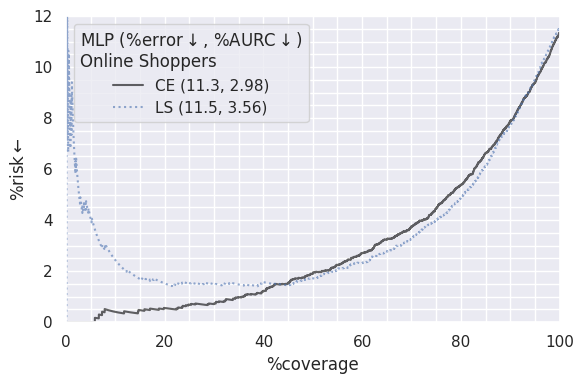

In [5]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set_theme()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(
    ce_cov * 100,
    ce_risk * 100,
    label=f"CE ({ce_risk[-1]*100:.1f}, {torch.trapz(ce_risk,ce_cov).item()*100:.2f})",
    alpha=0.6,
    color="black",
)
ax.plot(
    ls_cov * 100,
    ls_risk * 100,
    label=f"LS ({ls_risk[-1]*100:.1f}, {torch.trapz(ls_risk, ls_cov).item()*100:.2f})",
    alpha=0.6,
    linestyle="dotted",
)
ax.set_xlabel("%coverage")
ax.set_ylabel("%risk$\leftarrow$")
ax.legend(title="MLP (%error$\downarrow$, %AURC$\downarrow$)\nOnline Shoppers")
ax.grid(visible=True, which="both")
ax.set_xlim(0, 100)
ax.set_ylim(0, 12)
ax.minorticks_on()

fig.tight_layout()

if SAVE_IMG:
    plt.savefig("risk_coverage_curve_online_shoppers.pdf", dpi=300)

plt.show()